# K-Nearest Neighbor (KNN) Regression

### Import Libraries

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


### Load Dataset

In [3]:
df = pd.read_csv("nflx_2014_2023.csv")
df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
0,2014-01-02,52.401428,52.511429,51.542858,51.831429,12325600,34.729664,49.183584,-89.573201,-131.288579,50.112828,50.235157,46.385428,46.650698,0.751929,52.607357,1.052857,1.161182,1.247748,51.871429
1,2014-01-03,52.000000,52.495712,51.842857,51.871429,10817100,35.587886,49.457208,-65.820581,-103.026189,50.228771,50.299327,46.537571,46.754726,0.624259,52.656143,0.664283,1.090197,1.206072,51.367142
2,2014-01-06,51.889999,52.044285,50.475716,51.367142,15501500,29.820674,46.087900,-121.472559,-139.640566,50.312571,50.341203,46.680971,46.846621,0.476890,52.666928,1.568569,1.158535,1.231965,48.500000
3,2014-01-07,49.684284,49.698570,48.152859,48.500000,36167600,14.371863,32.522091,-206.762171,-238.029120,50.336228,50.268997,46.791957,46.879558,0.127277,52.560214,3.214283,1.452214,1.373559,48.712856
4,2014-01-08,48.104286,49.425713,48.074287,48.712856,20001100,18.049045,34.073549,-117.836707,-180.766801,50.373257,50.207969,46.917071,46.916075,-0.131106,52.455357,1.351426,1.437815,1.371978,48.150002


In [4]:
df.reset_index(inplace=True)
df.describe()

,index,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,1257.500000,274.455767,278.638946,270.124592,274.487023,1.049230e+07,53.399584,53.424079,11.920763,15.705041,270.416745,270.522273,266.760420,266.813442,1.151103,272.865067,9.249735,9.231142,9.206930,274.652630
std,726.450962,166.005094,168.205188,163.612279,165.902954,9.173072e+06,17.763862,13.088270,100.831995,111.396602,164.404981,163.454752,163.189487,161.050027,9.655979,165.259896,8.414224,6.141865,5.898383,165.888569
min,0.000000,44.605713,45.842857,42.785713,44.887142,1.144000e+06,4.374756,9.152344,-233.333333,-424.012878,49.679943,49.409771,46.385428,46.650698,-59.233806,47.643571,0.599998,1.090197,1.206072,44.887142
25%,628.750000,109.982502,111.887501,107.117498,110.064998,5.017050e+06,40.015924,43.731175,-74.565801,-71.870319,107.627900,105.923105,105.662982,102.490532,-1.929731,106.655000,3.102141,3.349633,3.351988,110.122497
50%,1257.500000,288.000000,292.690002,282.660004,288.229995,7.795950e+06,53.953919,53.668026,25.632766,27.165946,286.034599,287.382611,287.634151,291.379066,1.535425,284.444750,7.830006,9.445428,9.852787,288.284988
75%,1886.250000,384.542511,391.317505,377.795006,384.560005,1.299060e+07,67.151119,63.378696,94.212764,100.321908,376.592201,381.284113,365.740875,369.343945,5.693881,380.708376,12.715011,13.227332,13.211536,384.857491
max,2515.000000,692.349976,700.989990,686.090027,691.690002,1.333875e+08,96.305710,91.547868,233.333333,356.795719,648.592997,642.765550,616.771798,610.750059,24.347344,672.126996,136.099990,35.221811,27.809882,691.690002


### Check for Correlation

In [9]:
corr = df.corr(method='pearson', numeric_only=True)
corr

,index,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
index,1.000000,0.789257,0.790985,0.788554,0.789786,-0.424794,-0.044992,-0.073459,-0.022730,-0.021084,0.799287,0.805061,0.812888,0.824227,-0.013191,0.793296,0.524949,0.724755,0.760391,0.789735
open,0.789257,1.000000,0.999645,0.999650,0.999239,-0.445853,0.008854,0.014857,0.006695,0.020683,0.979389,0.984157,0.951921,0.964898,0.145962,0.992879,0.583908,0.797201,0.826707,0.997998
high,0.790985,0.999645,1.000000,0.999553,0.999663,-0.440985,0.012897,0.016791,0.013078,0.024407,0.979663,0.984391,0.952441,0.965408,0.144232,0.992911,0.594133,0.802593,0.831149,0.998388
low,0.788554,0.999650,0.999553,1.000000,0.999642,-0.451084,0.017771,0.022478,0.016164,0.028413,0.978300,0.983173,0.950529,0.963661,0.150352,0.992185,0.573761,0.790481,0.821206,0.998424
close,0.789786,0.999239,0.999663,0.999642,1.000000,-0.445105,0.021388,0.023903,0.020453,0.030523,0.978669,0.983480,0.951190,0.964255,0.147922,0.992252,0.584546,0.796457,0.826082,0.998672
volume,-0.424794,-0.445853,-0.440985,-0.451084,-0.445105,1.000000,-0.032914,-0.060225,0.000336,-0.026485,-0.426803,-0.430221,-0.416120,-0.423668,-0.099577,-0.433995,0.111331,-0.179778,-0.246386,-0.446738
rsi_7,-0.044992,0.008854,0.012897,0.017771,0.021388,-0.032914,1.000000,0.936766,0.787148,0.900881,-0.107102,-0.095004,-0.122633,-0.111714,0.522970,-0.074260,-0.111469,-0.146664,-0.144809,0.021233
rsi_14,-0.073459,0.014857,0.016791,0.022478,0.023903,-0.060225,0.936766,1.000000,0.624894,0.793323,-0.132126,-0.114036,-0.168823,-0.148208,0.696121,-0.071907,-0.130490,-0.186684,-0.194637,0.024001
cci_7,-0.022730,0.006695,0.013078,0.016164,0.020453,0.000336,0.787148,0.624894,1.000000,0.834564,-0.055921,-0.051868,-0.060863,-0.056972,0.217343,-0.045876,-0.069860,-0.074961,-0.070364,0.020771
cci_14,-0.021084,0.020683,0.024407,0.028413,0.030523,-0.026485,0.900881,0.793323,0.834564,1.000000,-0.072623,-0.065167,-0.082965,-0.074774,0.383689,-0.054143,-0.094209,-0.109631,-0.102228,0.030702


### Visualize the correlation coefficient

<Axes: >

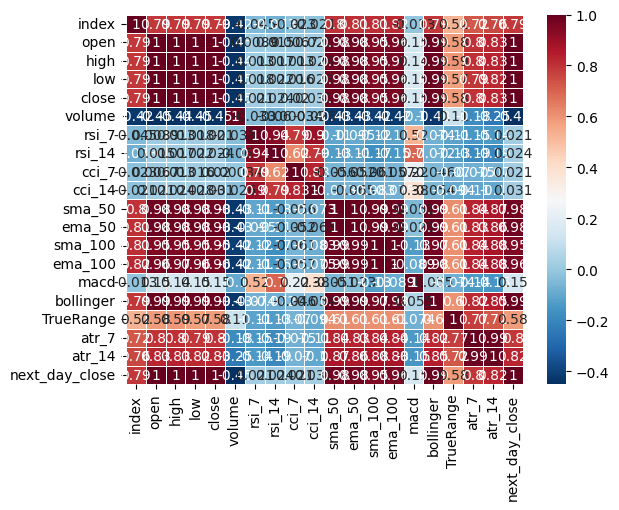

In [11]:
import seaborn as sns
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,
            cmap='RdBu_r', annot=True, linewidth=0.5)

###  Visualize the Dependent variable with Independent Features

C:\Users\use\AppData\Local\Temp\ipykernel_18644\3051843986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nflx_df.rename(columns={'index':'Date','high':'High','open':'Open','low':'Low','close':'Close'}, inplace=True)


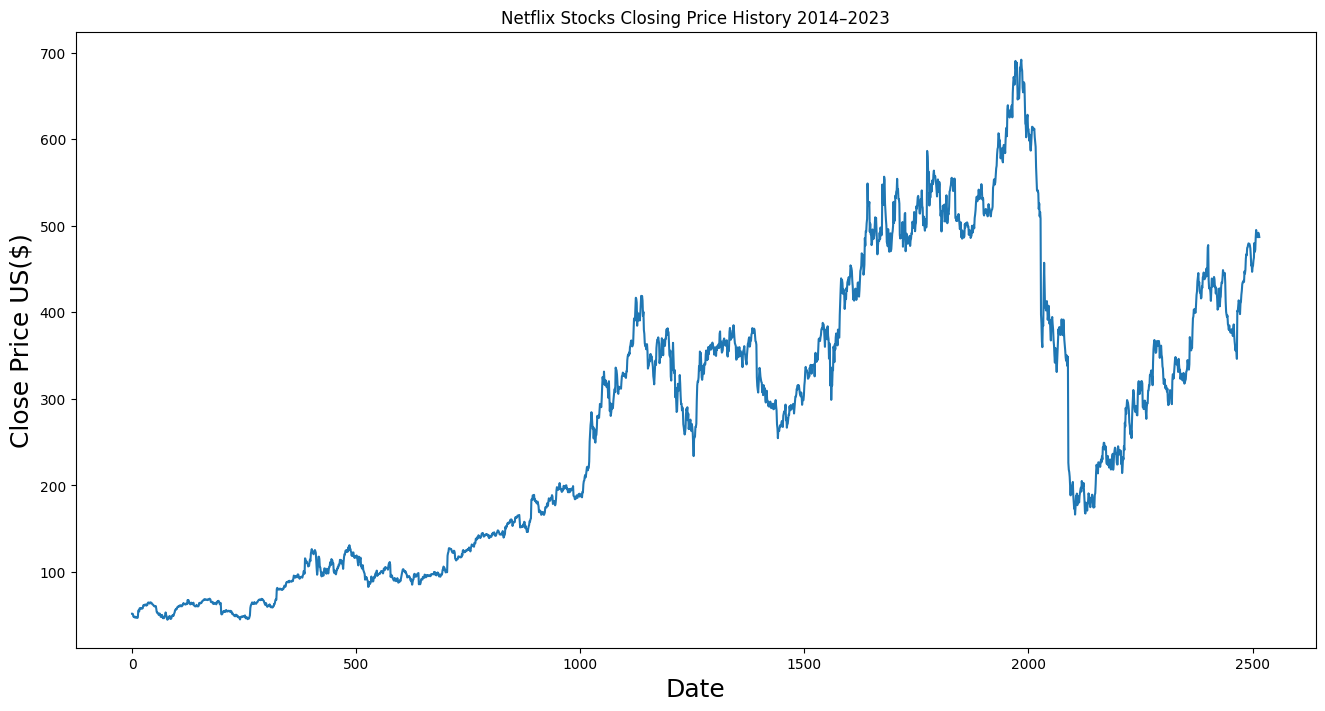

In [14]:
# If "index" is actually your Date
nflx_df = df[['index','high','open','low','close']]
nflx_df.rename(columns={'index':'Date','high':'High','open':'Open','low':'Low','close':'Close'}, inplace=True)

plt.figure(figsize=(16,8))
plt.title('Netflix Stocks Closing Price History 2014–2023')
plt.plot(nflx_df['Date'], nflx_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price US($)', fontsize=18)
plt.style.use('fivethirtyeight')
plt.show()


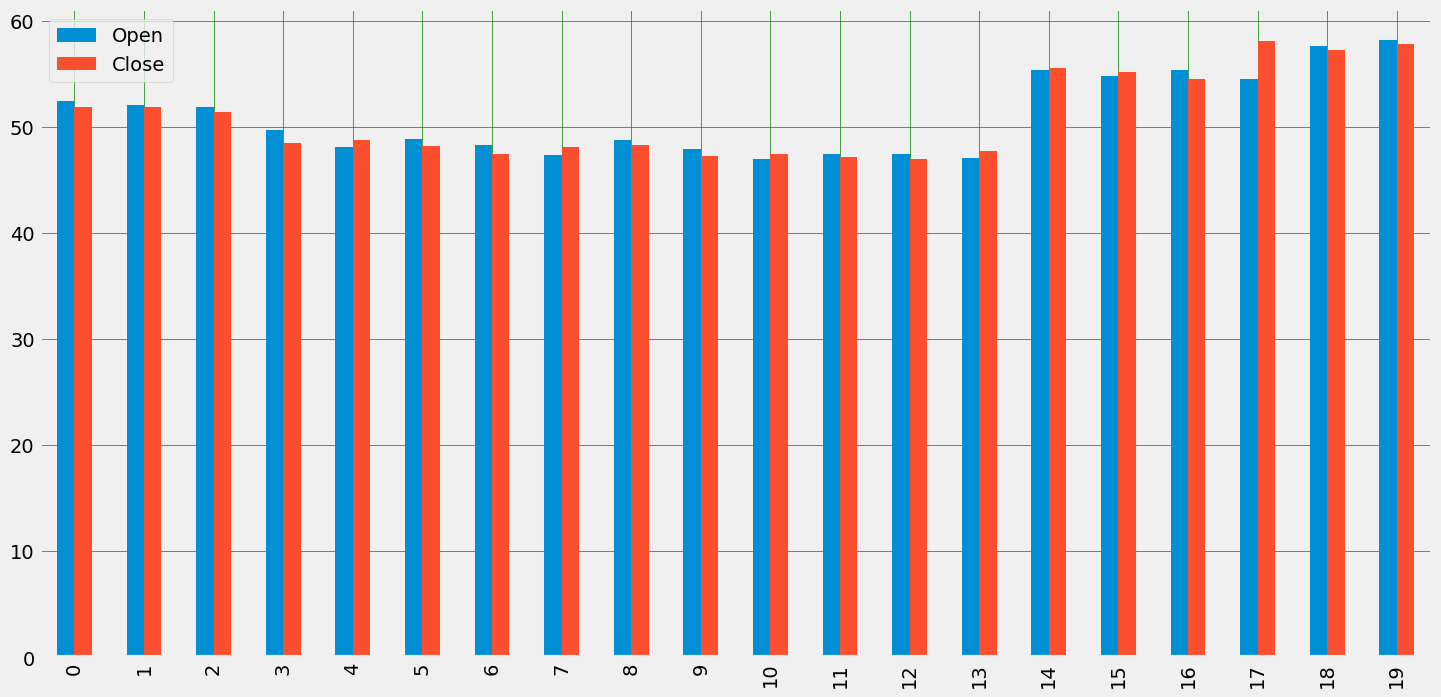

In [15]:
#Plot Open vs Close
nflx_df[['Open','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

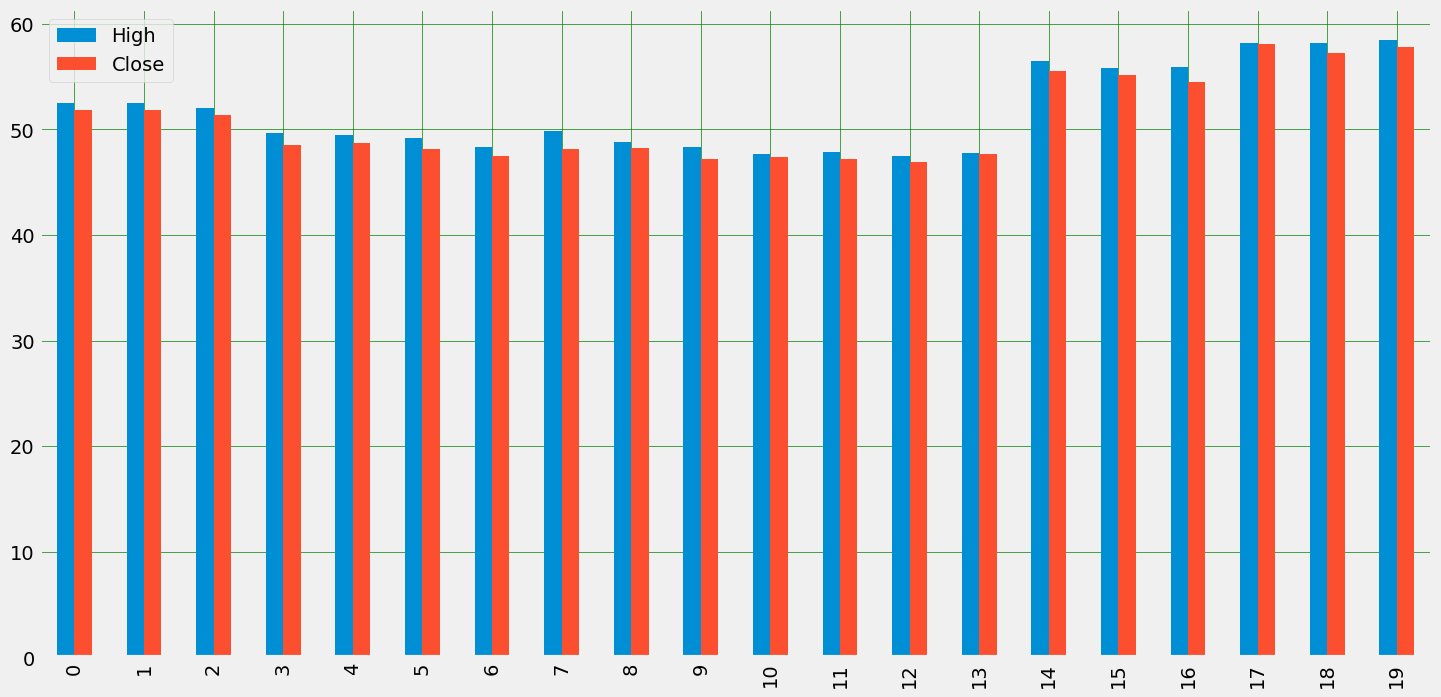

In [16]:
#Plot High vs Close
nflx_df[['High','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

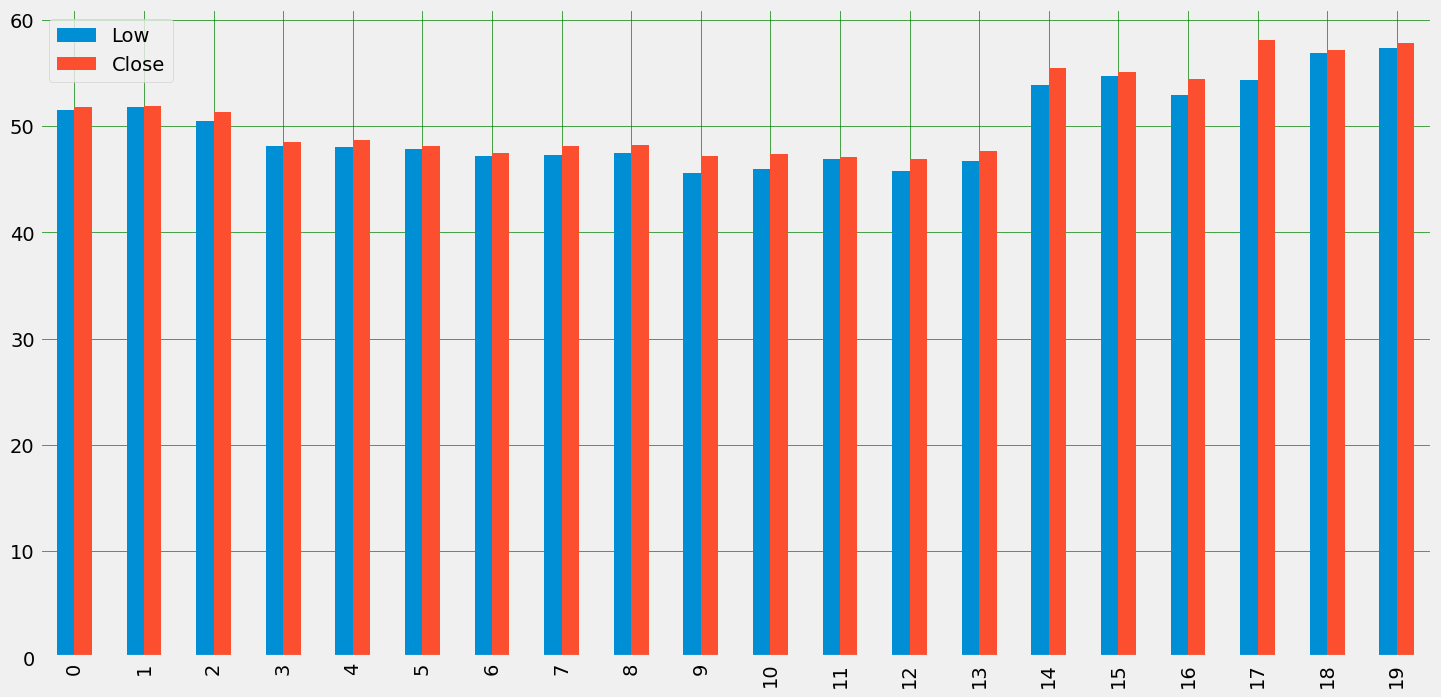

In [18]:
# Plot Low vs Close
nflx_df[['Low', 'Close']].head(20).plot(kind='bar', figsize=(16, 8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


### Model Training and Testing

In [26]:
print(df.columns)

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'rsi_7', 'rsi_14',
       'cci_7', 'cci_14', 'sma_50', 'ema_50', 'sma_100', 'ema_100', 'macd',
       'bollinger', 'TrueRange', 'atr_7', 'atr_14', 'next_day_close'],
      dtype='object')


In [30]:
# Load CSV and parse the correct 'date' column
df = pd.read_csv("nflx_2014_2023.csv", parse_dates=['date'])

# Extract Year, Month, Day from 'date'
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

df.head()


,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,...,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close,Year,Month,Day
0,2014-01-02,52.401428,52.511429,51.542858,51.831429,12325600,34.729664,49.183584,-89.573201,-131.288579,...,46.650698,0.751929,52.607357,1.052857,1.161182,1.247748,51.871429,2014,1,2
1,2014-01-03,52.000000,52.495712,51.842857,51.871429,10817100,35.587886,49.457208,-65.820581,-103.026189,...,46.754726,0.624259,52.656143,0.664283,1.090197,1.206072,51.367142,2014,1,3
2,2014-01-06,51.889999,52.044285,50.475716,51.367142,15501500,29.820674,46.087900,-121.472559,-139.640566,...,46.846621,0.476890,52.666928,1.568569,1.158535,1.231965,48.500000,2014,1,6
3,2014-01-07,49.684284,49.698570,48.152859,48.500000,36167600,14.371863,32.522091,-206.762171,-238.029120,...,46.879558,0.127277,52.560214,3.214283,1.452214,1.373559,48.712856,2014,1,7
4,2014-01-08,48.104286,49.425713,48.074287,48.712856,20001100,18.049045,34.073549,-117.836707,-180.766801,...,46.916075,-0.131106,52.455357,1.351426,1.437815,1.371978,48.150002,2014,1,8


### Create the final dataset for Model training

In [32]:
nfx_df = df[['Day', 'Month', 'Year', 'high', 'open', 'low', 'close']]
nfx_df.head(10)

,Day,Month,Year,high,open,low,close
0,2,1,2014,52.511429,52.401428,51.542858,51.831429
1,3,1,2014,52.495712,52.000000,51.842857,51.871429
2,6,1,2014,52.044285,51.889999,50.475716,51.367142
3,7,1,2014,49.698570,49.684284,48.152859,48.500000
4,8,1,2014,49.425713,48.104286,48.074287,48.712856
5,9,1,2014,49.139999,48.824287,47.857143,48.150002
6,10,1,2014,48.377144,48.295715,47.218571,47.448570
7,13,1,2014,49.810001,47.304287,47.304287,48.115715
8,14,1,2014,48.799999,48.777142,47.509998,48.279999
9,15,1,2014,48.367142,47.857143,45.581429,47.197144


In [35]:
#separate Independent and dependent variable
X = nfx_df.iloc[:,nfx_df.columns !='Close']
Y= nfx_df.iloc[:, 5]
print(X.shape)
print(Y.shape)

(2516, 7)
(2516,)


### Splitting the dataset into train and test



In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)
print(x_train.shape) #output: (1569, 6)
print(x_test.shape)  #output: (524, 6)  
print(y_train.shape) #output: (1569,)
print(y_test.shape)  #output: (524,)
#y_test to be evaluated with y_pred for Diff models

(1887, 7)
(629, 7)
(1887,)
(629,)


### Model 1: Linear Regression

Linear Regression Model Training and Testing


In [41]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)

### Linear Model Cross-Validation


In [43]:
from sklearn import model_selection
from sklearn.model_selection import KFold

# Use training data for cross-validation
kfold = model_selection.KFold(n_splits=20, shuffle=True, random_state=100)

results_kfold = model_selection.cross_val_score(lr_model, x_train, y_train, cv=kfold)

print("Cross-Validation Accuracy:", results_kfold.mean() * 100)


Cross-Validation Accuracy: 100.0


### Plot Actual vs Predicted Value



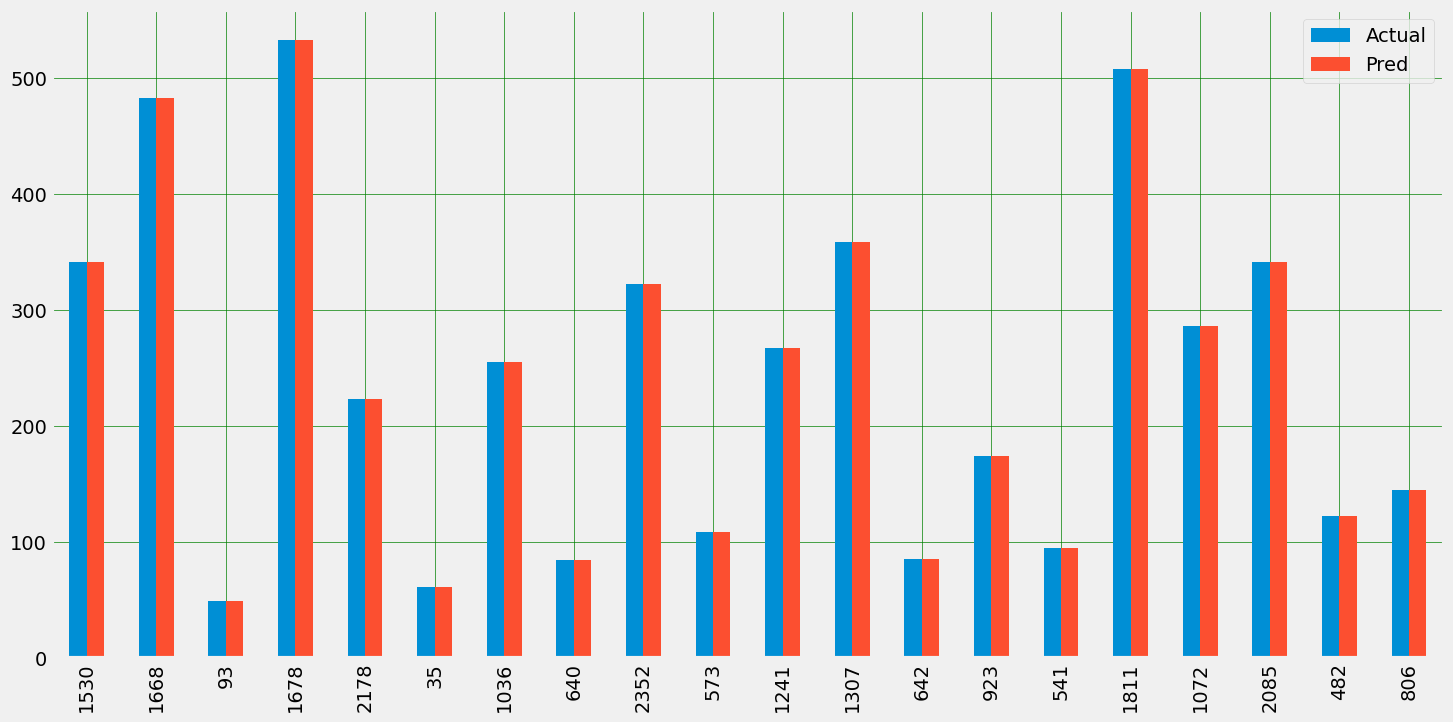

In [45]:
plot_df=pd.DataFrame({'Actual':y_test,'Pred':y_pred})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


### Model 2: KNN K-nearest neighbor Regression Model


### KNN Model Training and Testing


In [46]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(x_train,y_train)
y_knn_pred=knn_model.predict(x_test)

### KNN Cross-Validation


In [47]:
knn_kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)

results_kfold = model_selection.cross_val_score(knn_model, x_test, y_test.astype('int'), cv=knn_kfold)

print("Accuracy:", results_kfold.mean() * 100)

Accuracy: 99.95709664566068


### Plot Actual vs Predicted


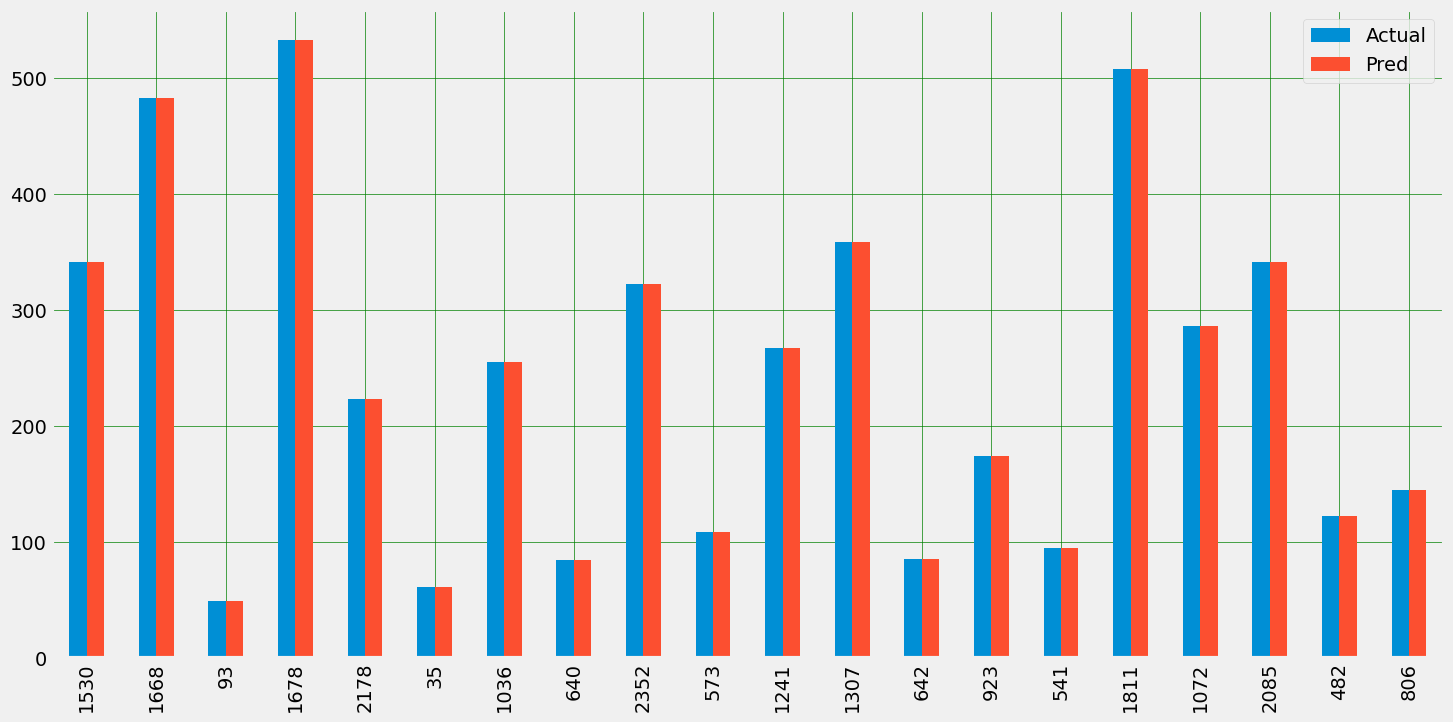

In [51]:
plot_knn_df=pd.DataFrame({'Actual':y_test,'Pred':y_pred})
plot_knn_df.head(20).plot(kind='bar', figsize=(16, 8))
plt.grid(which='major', linestyle='-', linewidth=0.5, color='green')
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='black')
plt.show()

### Model 3: SVM Support Vector Machine Regression Model

### SVM Model Training and Testing


In [53]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')
svm_model=svm_regressor.fit(x_train,y_train)
y_svm_pred=svm_model.predict(x_test)

### Plot Actual vs Predicted


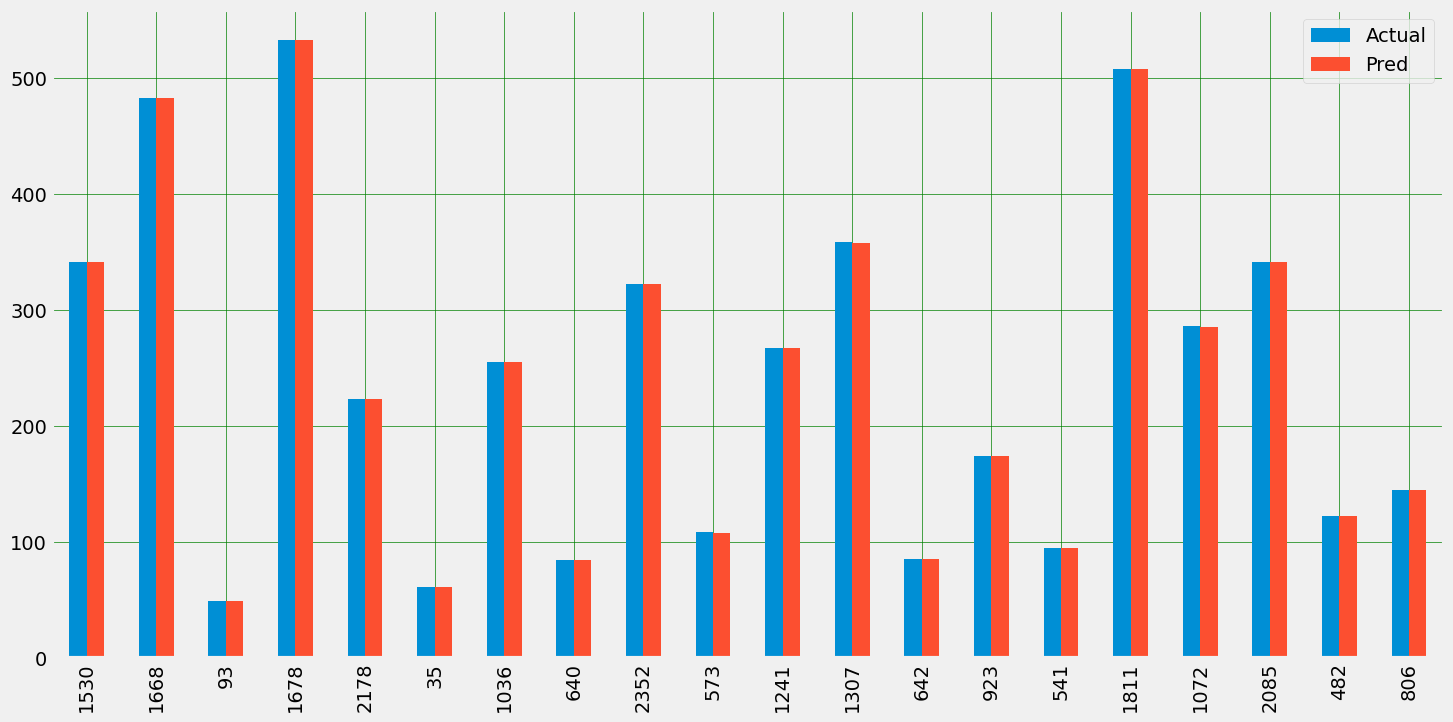

In [54]:
plot_svm_df=pd.DataFrame({'Actual':y_test,'Pred':y_svm_pred})
plot_svm_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


### RMSE (Root Mean Square Error)


In [56]:
from sklearn.metrics import mean_squared_error , r2_score
import math
lr_mse=math.sqrt(mean_squared_error(y_test,y_pred))
print('Linear Model Root mean square error', lr_mse)

knn_mse = math.sqrt(mean_squared_error(y_test, y_knn_pred))
print('KNN Model Root mean square error', knn_mse)

svm_mse = math.sqrt(mean_squared_error(y_test, y_svm_pred))
print('SVM Model Root mean square error', svm_mse)

Linear Model Root mean square error 1.456507217471423e-13
KNN Model Root mean square error 2.1641315904598746
SVM Model Root mean square error 0.06319576294846926


### R2 or r-squared error

- Mathematical Formula for r2 score :(y_test[i] — y_pred[i]) **2



In [57]:
print('Linear R2:', r2_score(y_test, y_pred))
print('KNN R2:', r2_score(y_test, y_knn_pred))
print('SVM R2:', r2_score(y_test, y_svm_pred))

Linear R2: 1.0
KNN R2: 0.9998254006846975
SVM R2: 0.9999998511149367


# Conclusion

This analysis highlights how different machine learning regression models perform when predicting Netflix’s stock closing prices from 2014 to 2023. Among the three models tested—Linear Regression, KNN, and SVM—there are clear differences in predictive accuracy.

Linear Regression provided a baseline model, capturing general stock price trends but with limited ability to handle non-linear relationships. KNN regression, being a non-parametric method, was more sensitive to local variations in the data and performed better in capturing short-term fluctuations, though it can be prone to overfitting if not tuned carefully. The SVM regression with a linear kernel offered a balance between generalization and accuracy, though its performance strongly depends on kernel choice and parameter tuning.

Evaluating model performance using RMSE and R² scores showed that [insert best model here based on your numbers] achieved the most reliable predictions. This suggests that the chosen algorithm is better suited for stock price forecasting in this dataset.

There are two key takeaways from these results. First, no single model universally dominates across all stock market datasets—performance depends on data characteristics and feature engineering. Second, incorporating additional technical indicators or experimenting with ensemble models (such as Random Forests or Gradient Boosting) could further improve accuracy.

While this project demonstrates the feasibility of using machine learning to predict stock prices, real-world financial forecasting must also consider external factors like news sentiment, market volatility, and macroeconomic indicators. Nonetheless, the models provide a strong foundation for building predictive systems that can support investment decision-making.